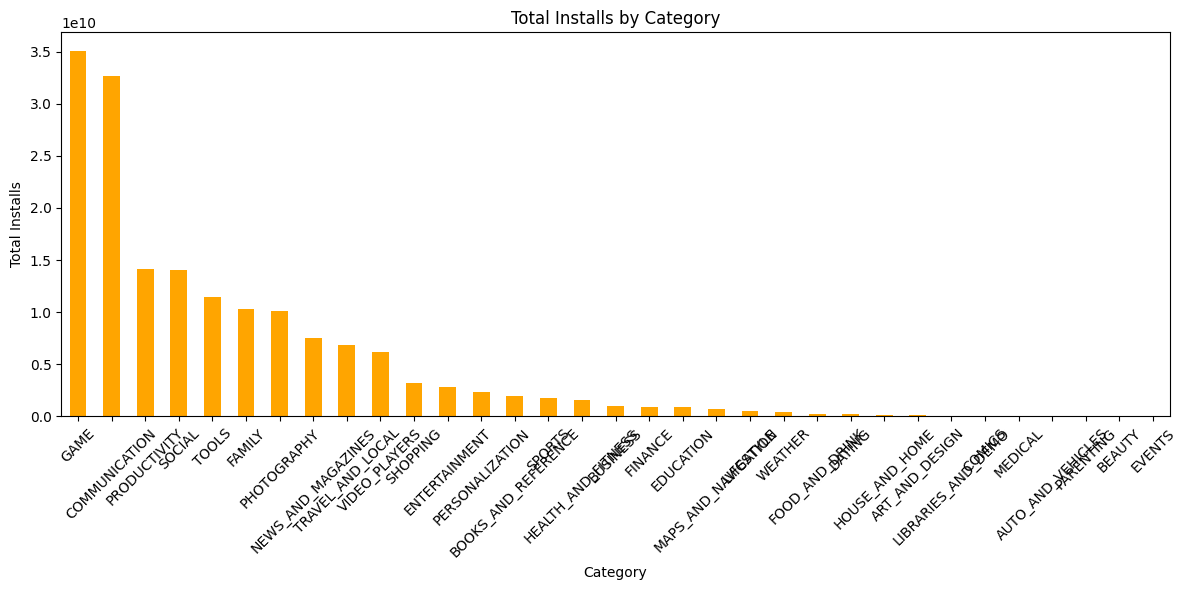

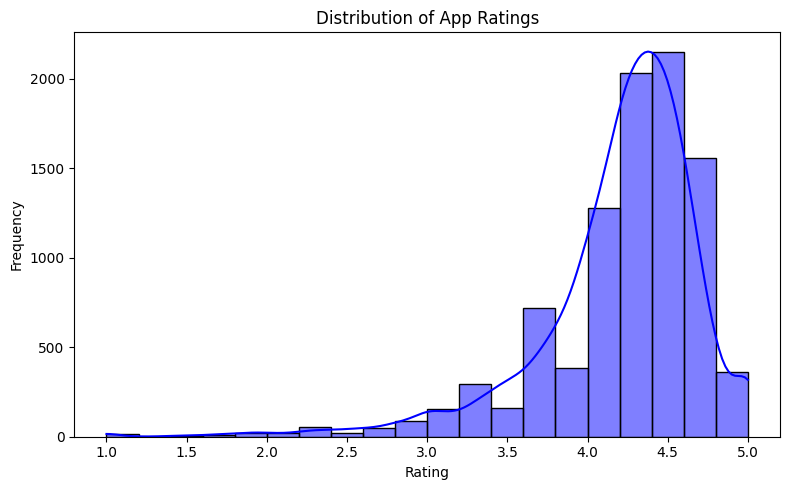

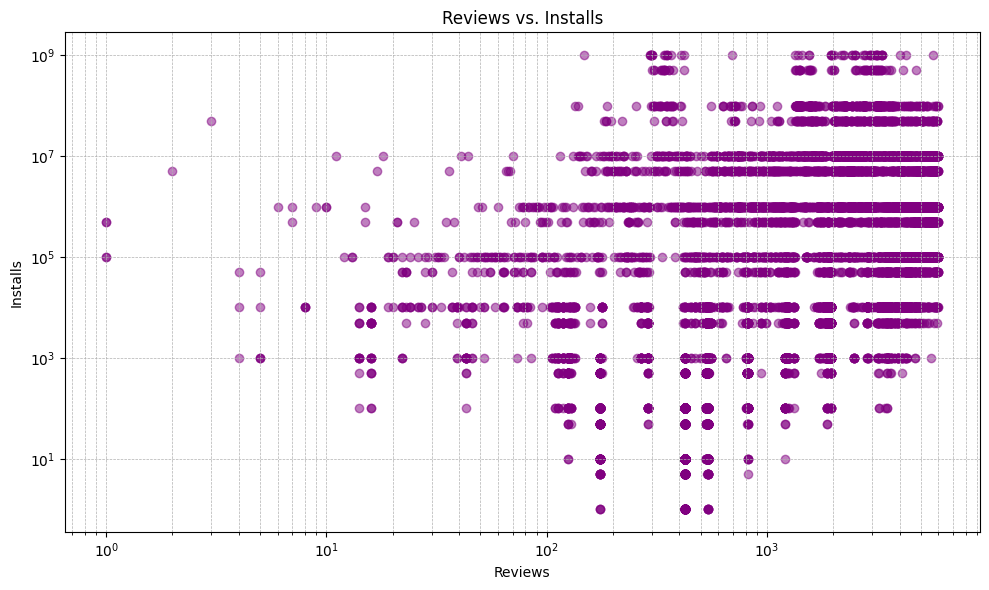

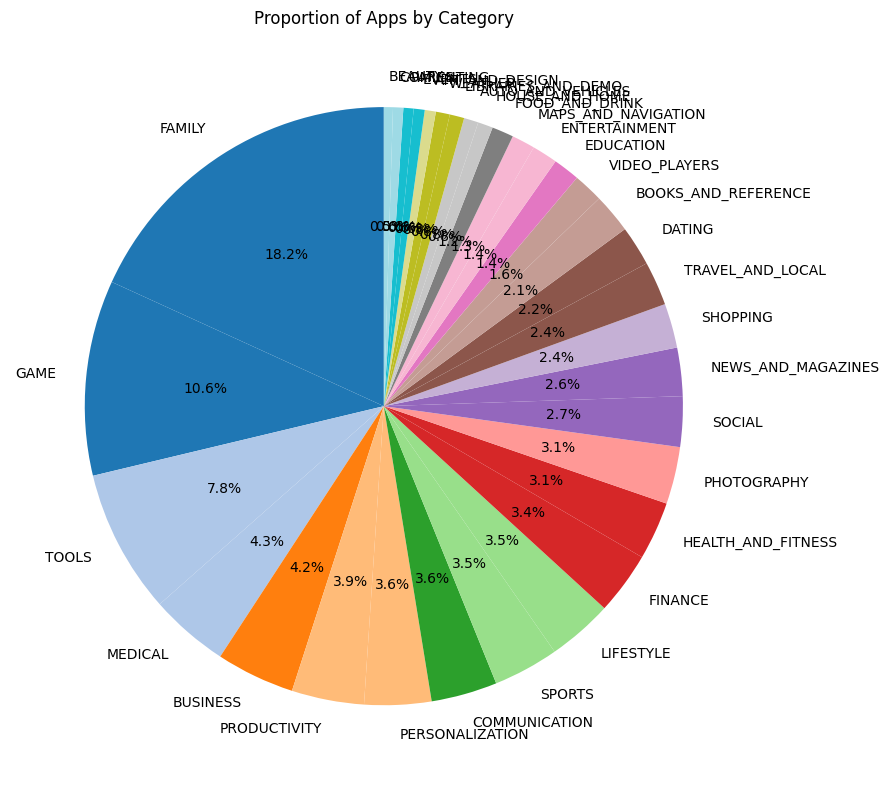

C:\Users\uabha\AppData\Local\Temp\ipykernel_22804\486982935.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Rating', palette='Set3')


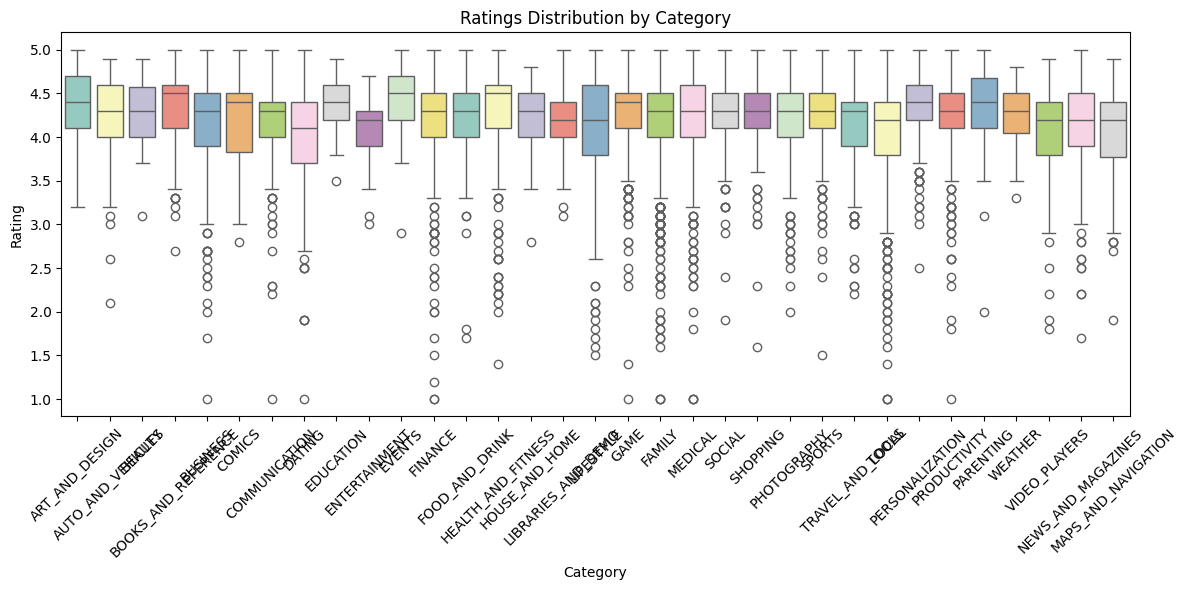

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
data_path = '../data/googleplaystore.csv'
df = pd.read_csv(data_path)

# Ensure the visuals folder exists
os.makedirs('../visuals', exist_ok=True)

# Clean the Installs column
df = df[df['Installs'].str.contains('^[0-9,]+\\+$', na=False)]  # Keep only rows with valid patterns
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Bar chart for installs by category
category_stats = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_stats.plot(kind='bar', color='orange')
plt.title('Total Installs by Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visuals/bar_chart_installs_by_category.png')
plt.show()

# Histogram for Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../visuals/histogram_ratings_distribution.png')
plt.show()

# Scatterplot for Reviews vs. Installs
plt.figure(figsize=(10, 6))
plt.scatter(df['Reviews'], df['Installs'], alpha=0.5, color='purple')
plt.title('Reviews vs. Installs')
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('../visuals/scatterplot_reviews_vs_installs.png')
plt.show()

# New Visualization: Pie Chart of App Category Proportions
category_proportions = df['Category'].value_counts()

plt.figure(figsize=(10, 8))
category_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20', fontsize=10)
plt.title('Proportion of Apps by Category')
plt.ylabel('')
plt.tight_layout()
plt.savefig('../visuals/pie_chart_category_proportions.png')
plt.show()

# New Visualization: Box Plot of Ratings by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Rating', palette='Set3')
plt.title('Ratings Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visuals/boxplot_ratings_by_category.png')
plt.show()